<a href="https://colab.research.google.com/github/u3254924/Boat-price/blob/main/U3254924_CapstoneProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Capstone_Project_F/

/content/drive/MyDrive/Capstone_Project_F


In [ ]:
!ls

BoatsCleanedDataset.csv  BoatsNoPriceDataset.csv


#This Project is based on the famous Boat Price Prediction data available from Kaggle repository.
https://www.kaggle.com/datasets/mexwell/boat-price-prediction/data
* Boats with No_Price dataset contains 937
* Boats with Cleaned dataset contains 18904
* My Project task is to create a machine learning model which can predict the average price of the list od boats sold on BoatTrader.com with various features
* For solving this problem, I will approach the task with a step by step approach to create a data analysis and prediction model based on (Machine Learning/Ai algorithms, regression algorith for example) available from different Python packages, modules and classes.

# Reading the Dataset
This is one of the most important steps in data analysis. Importing the dataset as read.pdYou must understand the data and the domain well before trying to apply my machine learning/Ai algorithm.

In [ ]:
#Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Pandas use for data loading, manipulation, cleaning and exploration
import pandas as pd
#Provies numerical computing functionalities used by other libraries.
import numpy as np
#sk1 is a library
from sklearn import metrics
#Matplotlib offers a broad set of plotting tools for creating basic to advanced visualisations
%matplotlib inline
#Library to plot graphs
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Capstone_Project_F/BoatsNoPriceDataset.csv")
print('Shape before deleting duplicate values:', df.shape)

df=df.drop_duplicates()
print('Shape after deleting duplicate values:', df.shape)

df.head()

Shape before deleting duplicate values: (936, 26)
Shape after deleting duplicate values: (936, 26)


,Unnamed: 0,id,type,boatClass,make,model,year,condition,length_ft,beam_ft,...,minEngineYear,engineCategory,price,sellerId,city,state,zip,created_date,created_month,created_year
0,2,7016498,power,power-center,Glasstream,240 CCX,2020,new,24.00,8.25,...,2020.0,outboard,NaN,35282,Punta Gorda,FL,33950.0,2019-03-13,3,2019
1,4,5841592,power,power-bay,Glasstream,228 Bay Tournament,2020,new,22.83,8.00,...,2020.0,outboard,NaN,61621,NaN,NaN,33950.0,2016-06-15,6,2016
2,7,4442873,power,power-center,Glasstream,221 CC,2020,new,22.00,8.08,...,2020.0,outboard,NaN,61621,Punta Gorda,FL,33950.0,2013-08-22,8,2013
3,12,5366255,power,power-center,Glasstream,221 CC,2020,new,22.00,8.08,...,2020.0,outboard,NaN,61621,Punta Gorda,FL,33950.0,2015-08-29,8,2015
4,17,6834355,power,power-skiwake,Mastercraft,Xstar,2019,new,23.00,8.50,...,NaN,inboard,NaN,21313,Greenville,SC,29605.0,2018-09-06,9,2018


In [ ]:
#using df short for Dataframe, the first attempt using the BoatsCleanedDataset as the name came to serval errors and spelling mistakes.
df=pd.read_csv("/content/drive/MyDrive/Capstone_Project_F/BoatsCleanedDataset.csv")
print('Shape before deleting duplicate values:', df.shape)

df=df.drop_duplicates()
print('Shape after deleting duplicate values:', df.shape)

df.head()

Shape before deleting duplicate values: (18903, 26)
Shape after deleting duplicate values: (18903, 26)


,Unnamed: 0,id,type,boatClass,make,model,year,condition,length_ft,beam_ft,...,minEngineYear,engineCategory,price,sellerId,city,state,zip,created_date,created_month,created_year
0,1,7252689,power,power-center,Aquasport,210 CC,1992,used,21.0,8.50,...,NaN,outboard-4s,16500.0,217053,Englewood,FL,34224,16/10/2019,10,2019
1,3,7228300,power,power-sportcruiser,Formula,400 Super Sport,2018,used,40.0,11.00,...,2018.0,inboard-outboard,539000.0,44260,Harsens Island,MI,48028,24/09/2019,9,2019
2,5,7271336,power,power-deck,Bayliner,Element 180,2020,new,18.0,7.42,...,2019.0,outboard-4s,26995.0,220570,Marietta,OH,45750,2/11/2019,11,2019
3,6,7222952,power,power-expresscruiser,Regal,32 Express,2015,used,32.0,10.33,...,NaN,multiple,169995.0,34834,North Charleston,SC,29405,19/09/2019,9,2019
4,8,6824832,power,power-aft,Carver,440 Aft Cabin Motor Yacht,1994,used,44.0,15.00,...,1994.0,inboard,109900.0,17942,Middle River,MD,21220,29/08/2018,8,2018


# Key observation
* This file contains BoatCleanedDataset 18904 boat details from the BoatTrader.com and contains BoatNoPriceDataset 937 boat details from the BoatTrader.com.
* There are 26 attributes in both (They are the same) Dataset and they are outlined above the data.
* Unnamed - ??
* ID - Unique user
* type - Type of boat power
* boatClass - Different type of boats clases based on the power and intend use of the boat.
* make - Which brand
* model - Type of style of the boat
* year - The year the boat was manufactred
* condition - If brand new or second-hand
* length_ft - the length of the boat in Feet
* bean_ft - Bean length in Feet
* dryWeight_lb - Weight of the factory supplied minimum sail-away package, less fluids
* hullMaterial - the watertight body of a ship or boat. Materials made of.
* fuelType - What type of fuel it runs.
* numEngine - how many engines the boat have.
* totalHP - Horsepower for the boat.
* maxEngineYear - Represents the maximum engine manufacting year for the boats in the dataset.
* minEngineYear - Represents the minimum engine manufacting year for the boats in the dataset.
* engineCategory - Type of Engine?
* price - the price of the boat
* sellerId - ID of the seller who sold the boat
* city - the city they got it from or where they live?
* state - the state they got it from or where they live?
* zip - Zipcode?
* created_date - When the ad was put online day/date
* created_month - When the ad was put online month
* created_year - When the ad was put online year

# Step 2: Problem Statement Definition
* "I'm developing a predictive model to estimate the prices of boats.
* Target Variable: Prices
Predictors/Features: type, make, model etc."

# Step 3: Choosing the appropriate ML/AI Algorithm for Data Analysis.

* Based on the problem statement, the first test model is to create a linear Regression model, as the target variable is continuous.

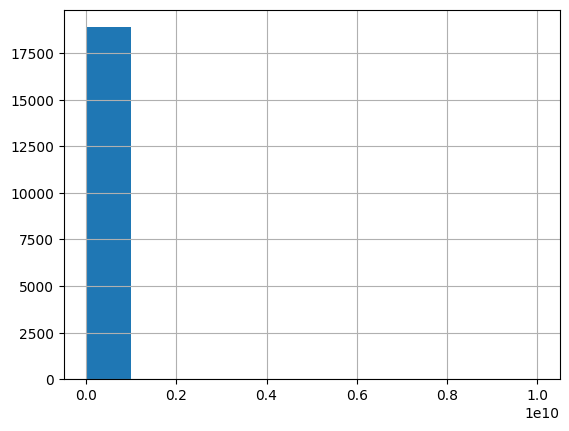

In [ ]:
# Creating hisgram as the Target variable is Continuous
# This will help us to understand the distribution of the price values
df['price'].hist()
plt.show()

#Observations from Step 4
* The data distribution of the target variable is (Not satisfactory to proceed further)
* (There are sufficient number of rows for each type of values to learn from).s

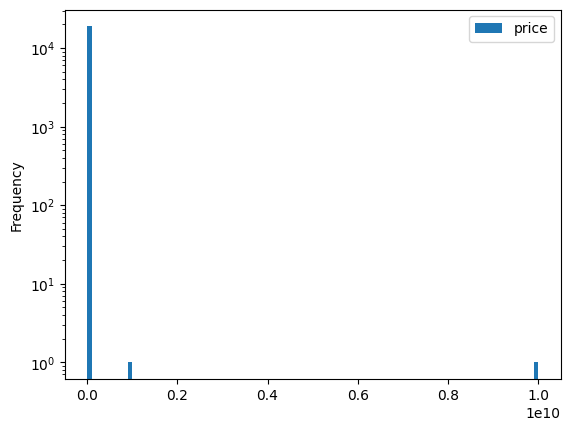

In [ ]:
# Using bin to convert from a decimal value to its corresponding binary value to give a better output of the histogram
df.plot.hist(y='price',bins=100)
plt.yscale('log')

# Observation 4 Pt2
* The data distribution of the target variable is ( satisfactory to proceed further-ish) it would be better if there were more of a curve bell shape and more input.

#Step 5: Basic Exploratory Data Analysis
* This step is performed to guage the overall data.
* The volume of data, the types of columns present in the data.
* Initial assessment of data should be done to identify which columns are Quanititative, Categorical or Qualitative.
* This step helps to start the column/data rejection process.
* You must look at each column carefully and ask, does this column affect the values of the Target variable/Class?
* For example in this dataset, you will ask, does this column affect the price of the boat?
* if the answer is a clear "No", then remove the column immediately from the data, otherwise keep the column for further analysis.
There are four commands which are used for Basic data exploratory Analysis in Python.
* head() :This helps to see a few sample rows of the data
* info(): This provides the summarsied information of the data
* describe(): This provides the descriptive statistical details of the data
* nunique(): This help us to identify if a column is categorical or continuous

In [ ]:
# Showing a few sample
df.head()

,Unnamed: 0,id,type,boatClass,make,model,year,condition,length_ft,beam_ft,...,minEngineYear,engineCategory,price,sellerId,city,state,zip,created_date,created_month,created_year
0,1,7252689,power,power-center,Aquasport,210 CC,1992,used,21.0,8.50,...,NaN,outboard-4s,16500.0,217053,Englewood,FL,34224,16/10/2019,10,2019
1,3,7228300,power,power-sportcruiser,Formula,400 Super Sport,2018,used,40.0,11.00,...,2018.0,inboard-outboard,539000.0,44260,Harsens Island,MI,48028,24/09/2019,9,2019
2,5,7271336,power,power-deck,Bayliner,Element 180,2020,new,18.0,7.42,...,2019.0,outboard-4s,26995.0,220570,Marietta,OH,45750,2/11/2019,11,2019
3,6,7222952,power,power-expresscruiser,Regal,32 Express,2015,used,32.0,10.33,...,NaN,multiple,169995.0,34834,North Charleston,SC,29405,19/09/2019,9,2019
4,8,6824832,power,power-aft,Carver,440 Aft Cabin Motor Yacht,1994,used,44.0,15.00,...,1994.0,inboard,109900.0,17942,Middle River,MD,21220,29/08/2018,8,2018


In [ ]:
# Summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18903 entries, 0 to 18902
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      18903 non-null  int64  
 1   id              18903 non-null  int64  
 2   type            18903 non-null  object 
 3   boatClass       18903 non-null  object 
 4   make            18903 non-null  object 
 5   model           18868 non-null  object 
 6   year            18903 non-null  int64  
 7   condition       18903 non-null  object 
 8   length_ft       18903 non-null  float64
 9   beam_ft         12399 non-null  float64
 10  dryWeight_lb    7094 non-null   float64
 11  hullMaterial    18903 non-null  object 
 12  fuelType        15951 non-null  object 
 13  numEngines      18903 non-null  int64  
 14  totalHP         18055 non-null  float64
 15  maxEngineYear   2205 non-null   float64
 16  minEngineYear   2174 non-null   float64
 17  engineCategory  8410 non-null  

In [ ]:
# Describe
df.describe(include='all')

,Unnamed: 0,id,type,boatClass,make,model,year,condition,length_ft,beam_ft,...,minEngineYear,engineCategory,price,sellerId,city,state,zip,created_date,created_month,created_year
count,18903.000000,1.890300e+04,18903,18903,18903,18868,18903.000000,18903,18903.000000,12399.00000,...,2174.000000,8410,1.890300e+04,18903.000000,18847,18903,10215,18903,18903.000000,18903.000000
unique,NaN,NaN,3,72,960,7899,NaN,2,NaN,NaN,...,NaN,9,NaN,NaN,1149,49,1046,1424,NaN,NaN
top,NaN,NaN,power,power-pontoon,Tracker,Z18,NaN,new,NaN,NaN,...,NaN,outboard,NaN,NaN,Red Wing,FL,70072,5/08/2019,NaN,NaN
freq,NaN,NaN,18610,4038,1894,93,NaN,11189,NaN,NaN,...,NaN,4876,NaN,NaN,598,2916,268,545,NaN,NaN
mean,9782.042216,6.947263e+06,NaN,NaN,NaN,NaN,2013.145956,NaN,23.803935,16.19693,...,2007.919503,NaN,6.471469e+05,49891.652225,NaN,NaN,NaN,NaN,6.945511,2018.503465
std,5749.171393,4.820519e+05,NaN,NaN,NaN,NaN,10.502989,NaN,14.613329,36.83357,...,12.462496,NaN,7.309567e+07,60725.592092,NaN,NaN,NaN,NaN,3.007115,1.093103
min,1.000000,4.449130e+05,NaN,NaN,NaN,NaN,1910.000000,NaN,1.000000,0.08000,...,1938.000000,NaN,5.000000e+02,1003.000000,NaN,NaN,NaN,NaN,1.000000,2003.000000
25%,4783.500000,6.895201e+06,NaN,NaN,NaN,NaN,2011.000000,NaN,18.000000,7.83000,...,2001.000000,NaN,1.925500e+04,10550.000000,NaN,NaN,NaN,NaN,5.000000,2018.000000
50%,9603.000000,7.061616e+06,NaN,NaN,NaN,NaN,2019.000000,NaN,21.000000,8.50000,...,2012.000000,NaN,3.419500e+04,34482.000000,NaN,NaN,NaN,NaN,8.000000,2019.000000
75%,14718.500000,7.179152e+06,NaN,NaN,NaN,NaN,2019.000000,NaN,25.000000,9.00000,...,2019.000000,NaN,5.783000e+04,53226.000000,NaN,NaN,NaN,NaN,9.000000,2019.000000


In [ ]:
# Idenfity which is categorical or continuous
df.nunique()

Unnamed: 0        18903
id                18903
type                  3
boatClass            72
make                960
model              7899
year                 80
condition             2
length_ft           599
beam_ft             350
dryWeight_lb       1160
hullMaterial          9
fuelType              4
numEngines            5
totalHP             286
maxEngineYear        67
minEngineYear        66
engineCategory        9
price              6074
sellerId           1375
city               1149
state                49
zip                1046
created_date       1424
created_month        12
created_year         16
dtype: int64

#Observation from Step 5 - Basic Exploratory Data Analysis

Based on the basic exploration above, you can now create a simple report of the data, noting down your observations regaring each column.

Hence, creating a initial roadmap for further analysis.

The select columns in this step are not final, further study will be done and then a final list will be created.

*

#Step 6 remove unwanted columns
* From the dataset unnamed and id is not nessary to have.

In [ ]:
df=df.drop(columns=['Unnamed: 0','id'])

In [ ]:
df.nunique()

type                 3
boatClass           72
make               960
model             7899
year                80
condition            2
length_ft          599
beam_ft            350
dryWeight_lb      1160
hullMaterial         9
fuelType             4
numEngines           5
totalHP            286
maxEngineYear       67
minEngineYear       66
engineCategory       9
price             6074
sellerId          1375
city              1149
state               49
zip               1046
created_date      1424
created_month       12
created_year        16
dtype: int64

#Observation Step 6:
* Now the Unnamed 0 and type have been removed.

#Step 8: Visual Exploratory Data Analysis
* We can spot a categorical variable in the data by looking at the unique values in them.
* Typically a categorical variable contains less than 20 unique vales AND there is repetition of values, which means the data can be grouped by those unique values.
* Based on the Basic Exploration Data Analysis in the previous step, we could spotted 11 categorical predictors in the data
* Categorical Predictors:
* "type", "condition", "hullMaterial", "fuelType", "numEngines", "engineCategory", "state", "created_month", "created_year", "boatClass", "make".

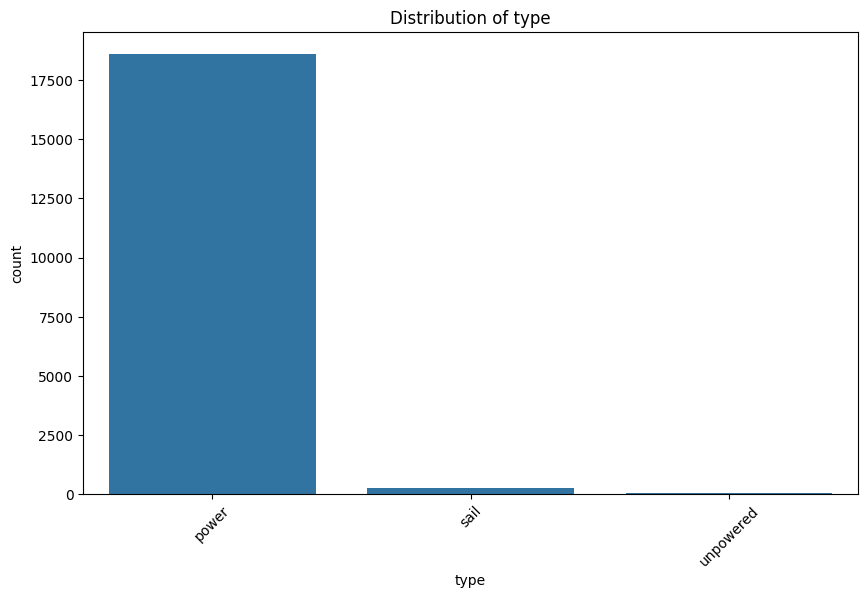

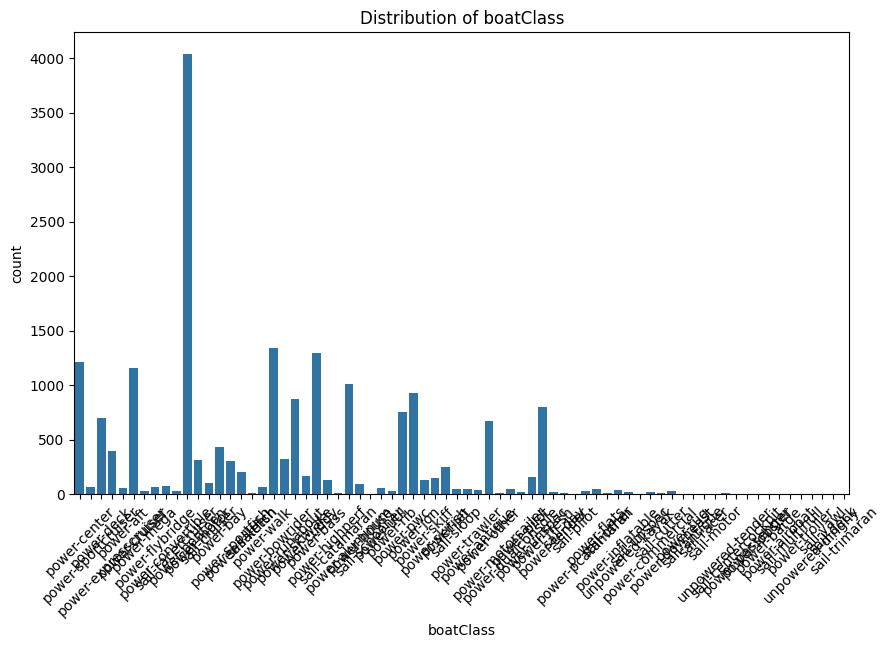

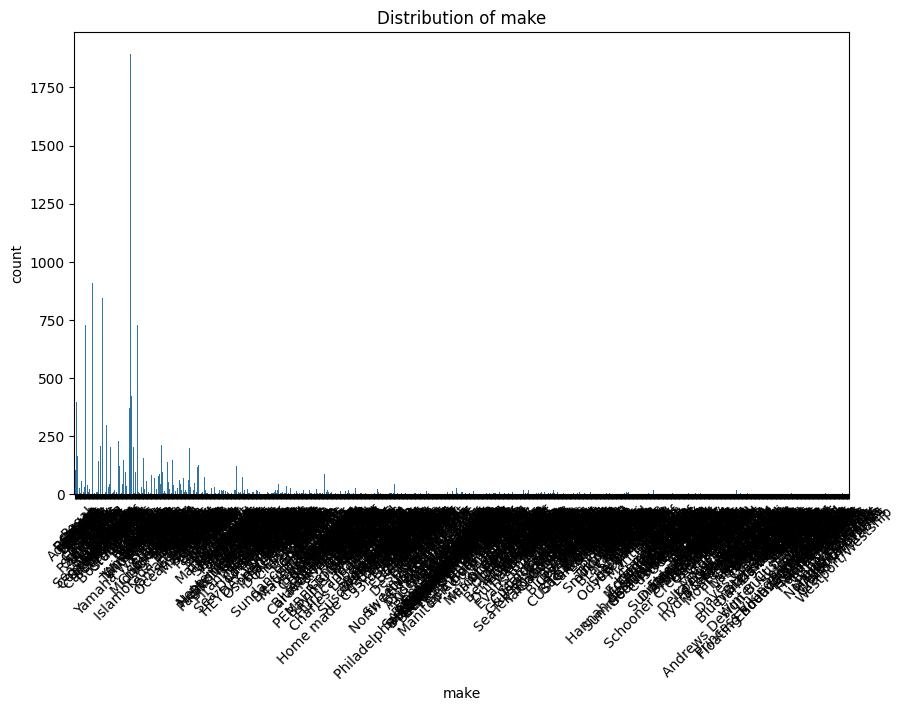

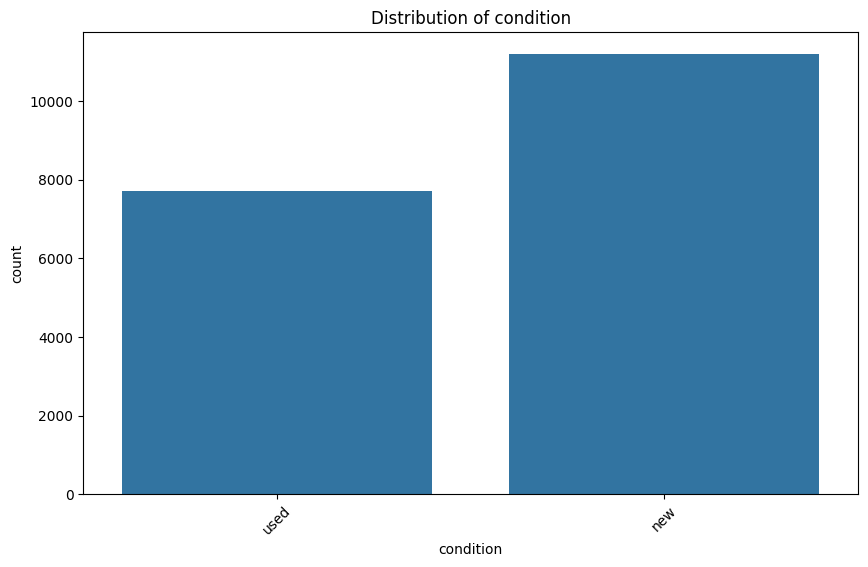

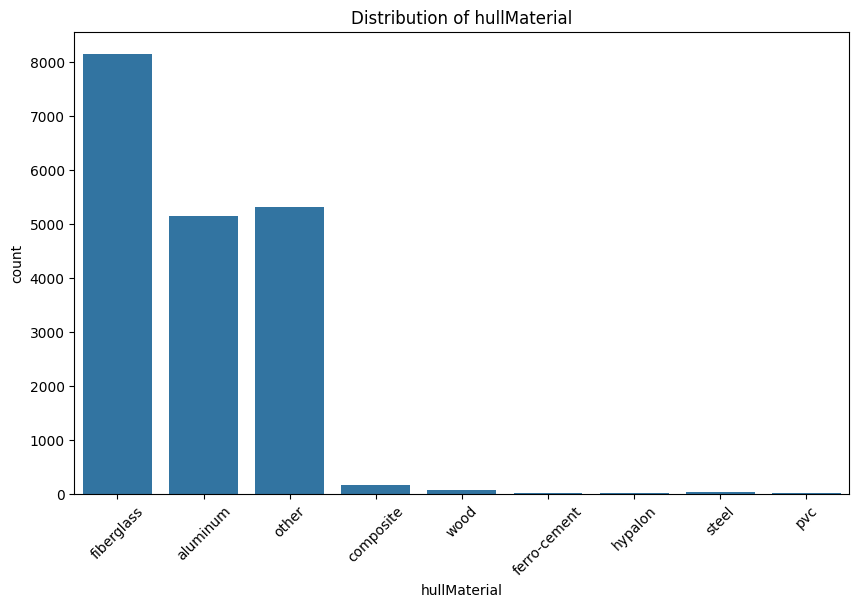

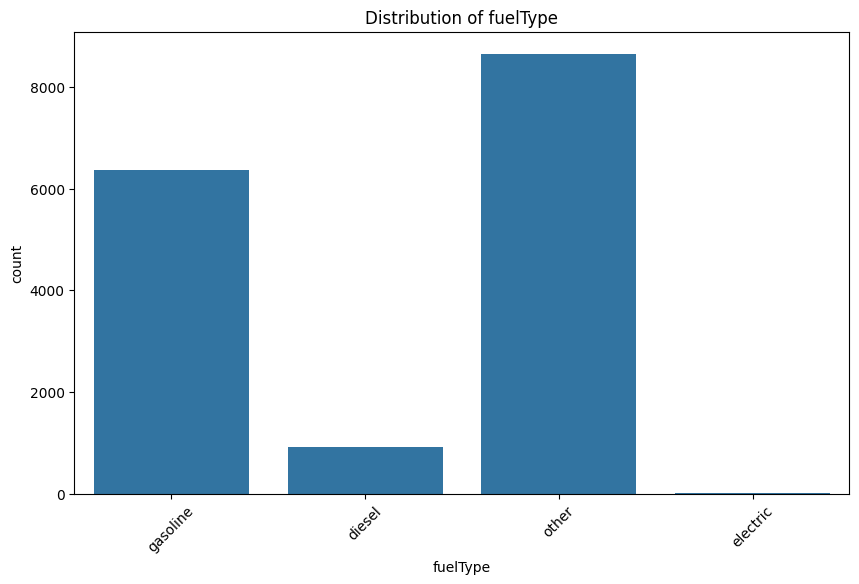

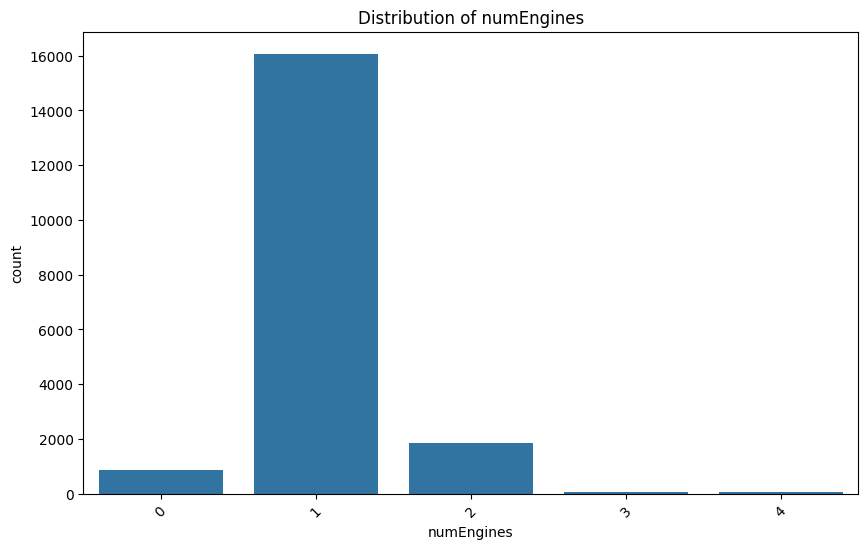

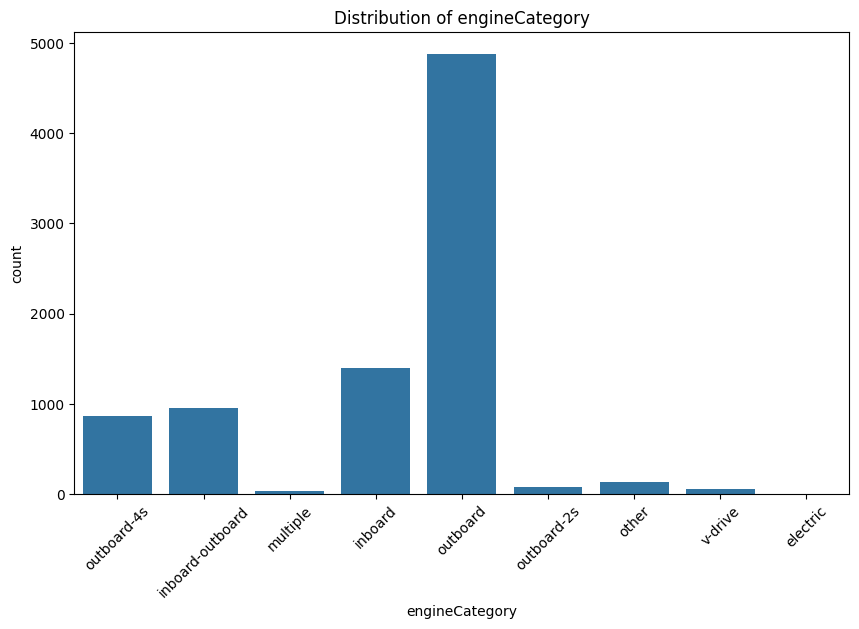

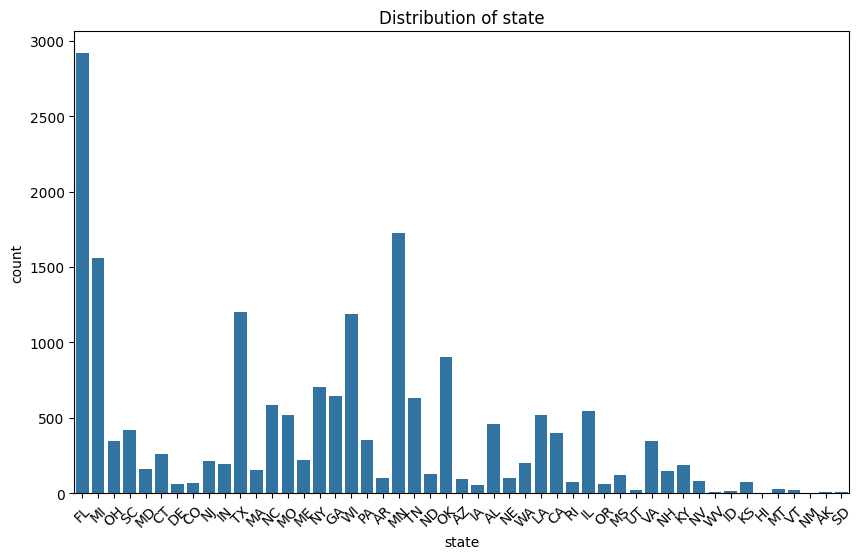

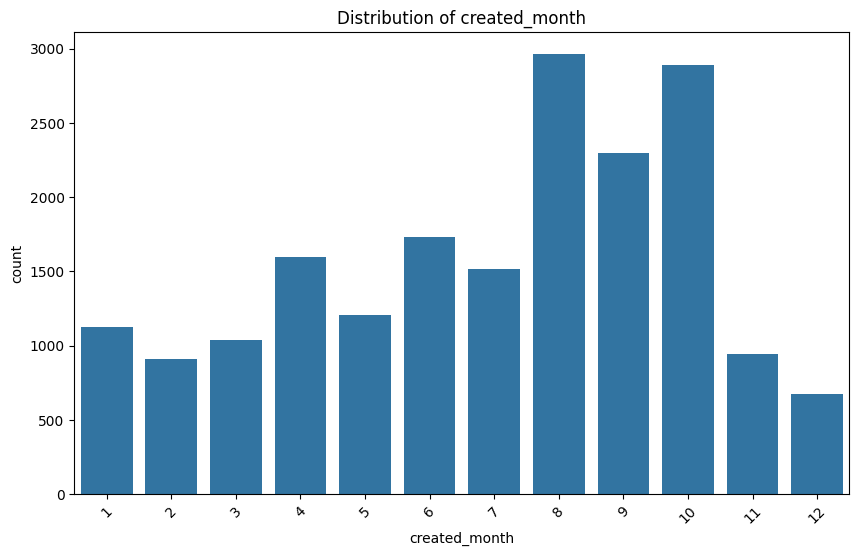

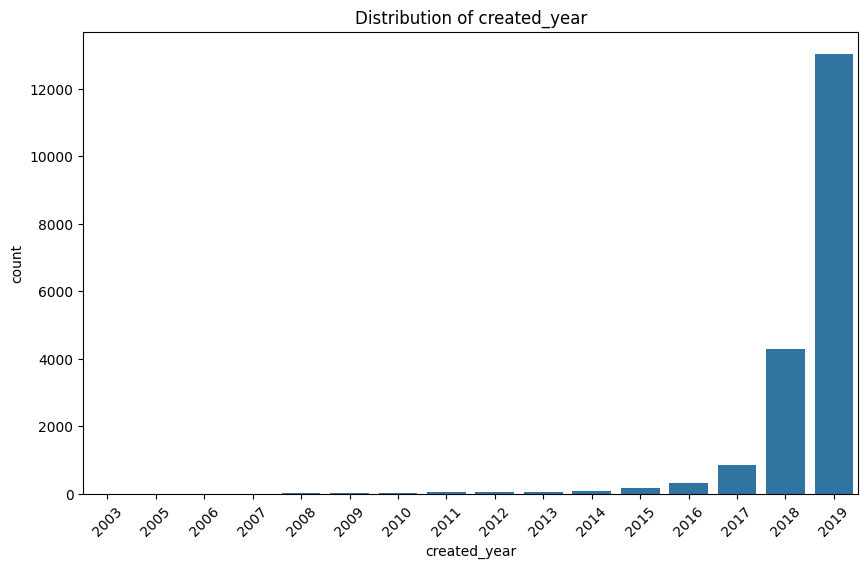

In [ ]:
import seaborn as sns
categorical_vars = ["type", "boatClass", "make", "condition", "hullMaterial", "fuelType", "numEngines", "engineCategory", "state", "created_month", "created_year"]
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=var, data=df)
    plt.title(f'Distribution of {var}')
    plt.xticks(rotation=45)
    plt.show()

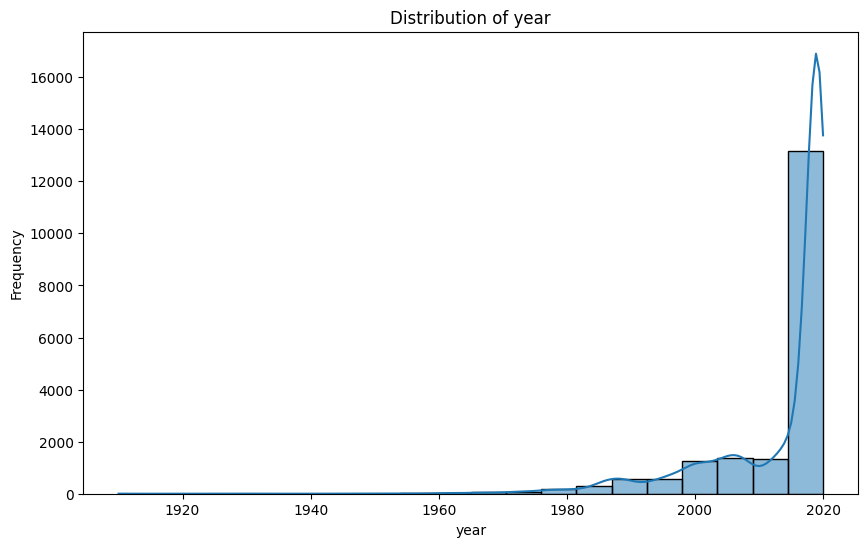

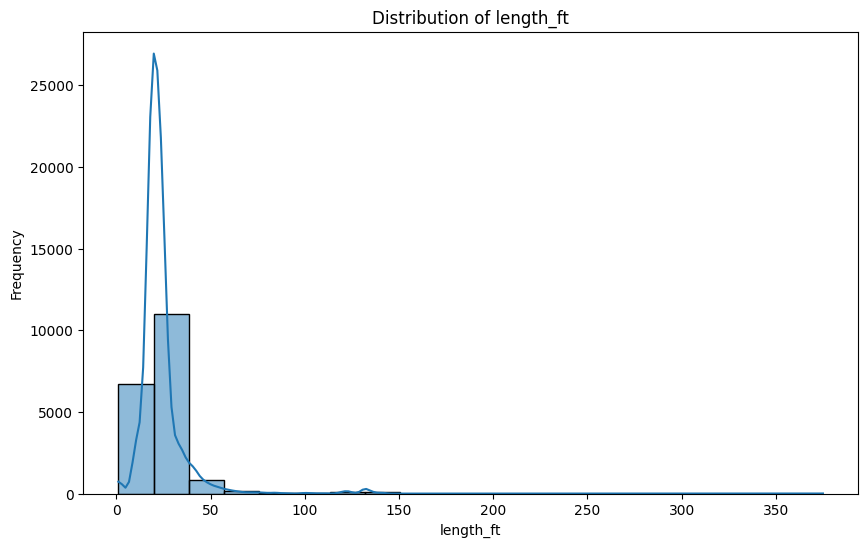

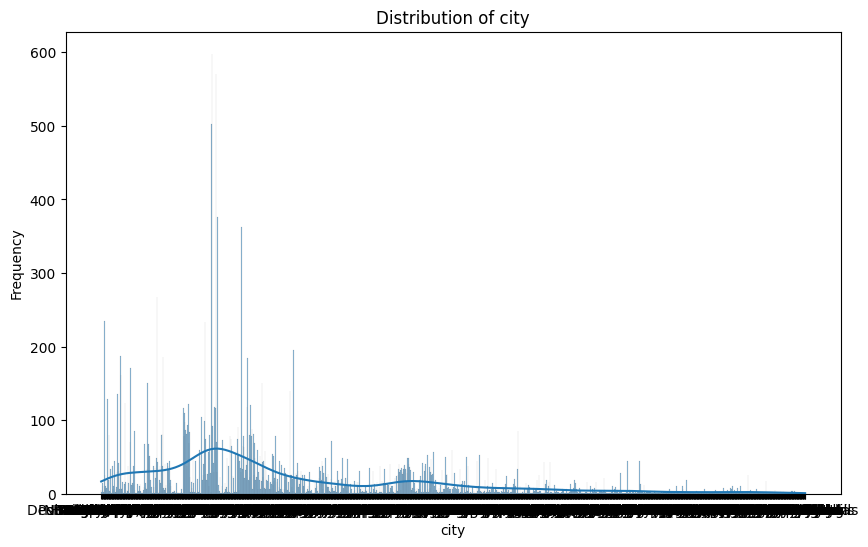

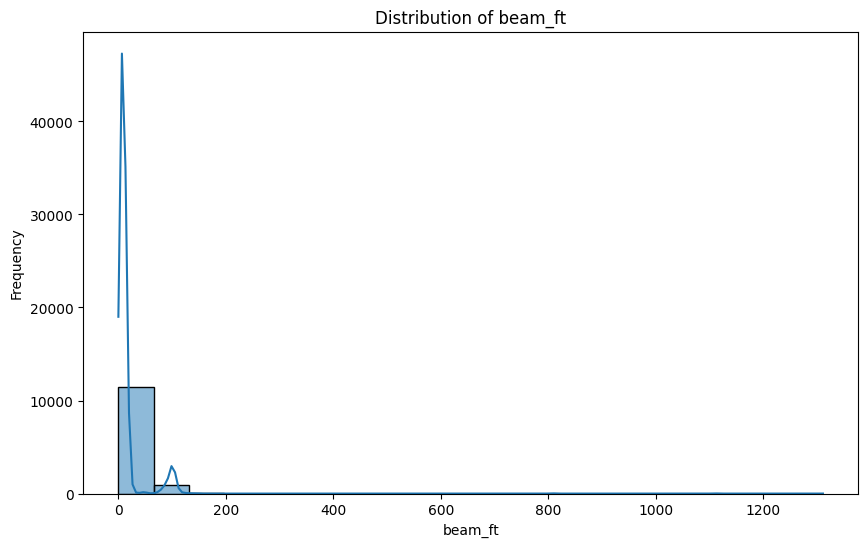

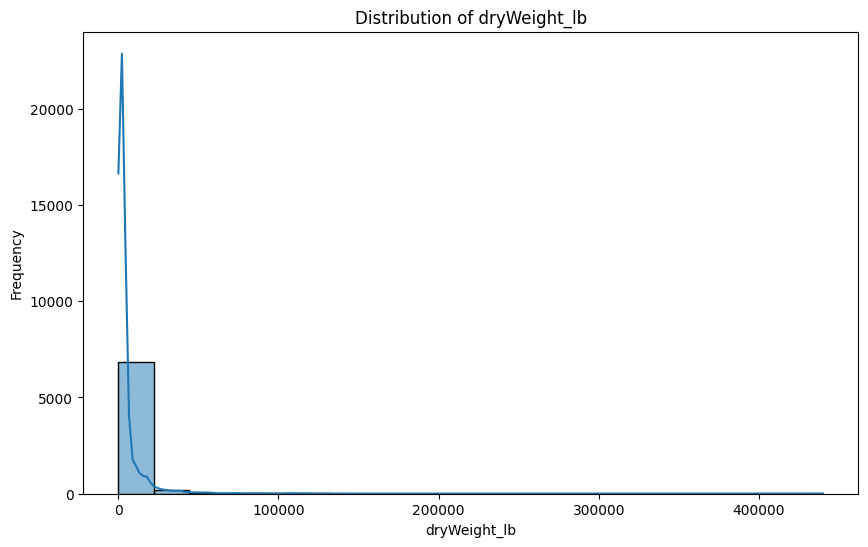

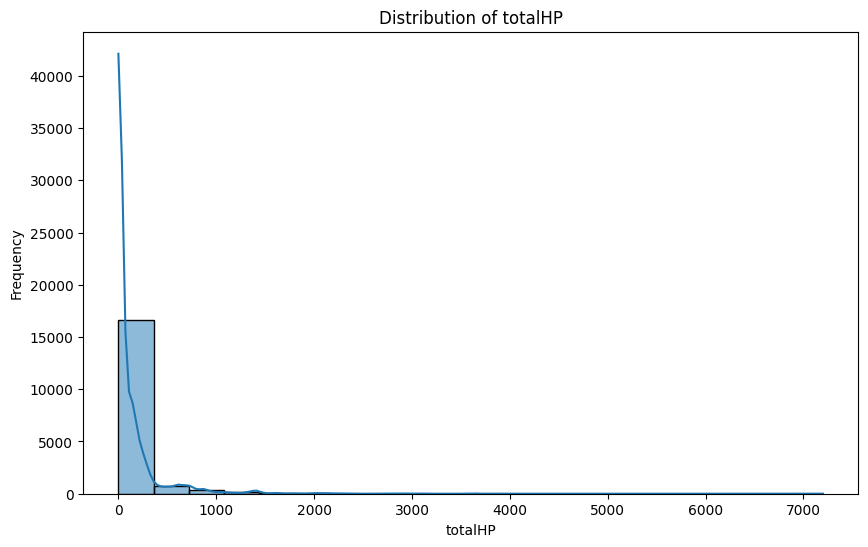

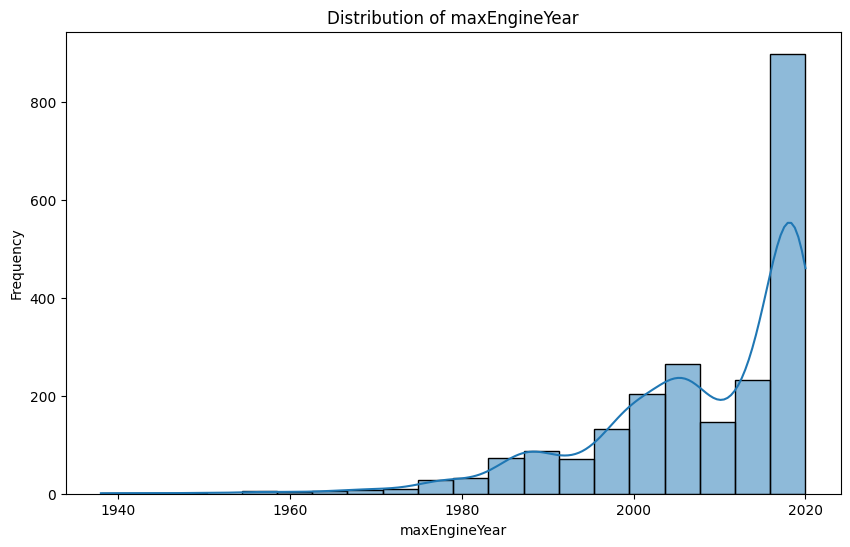

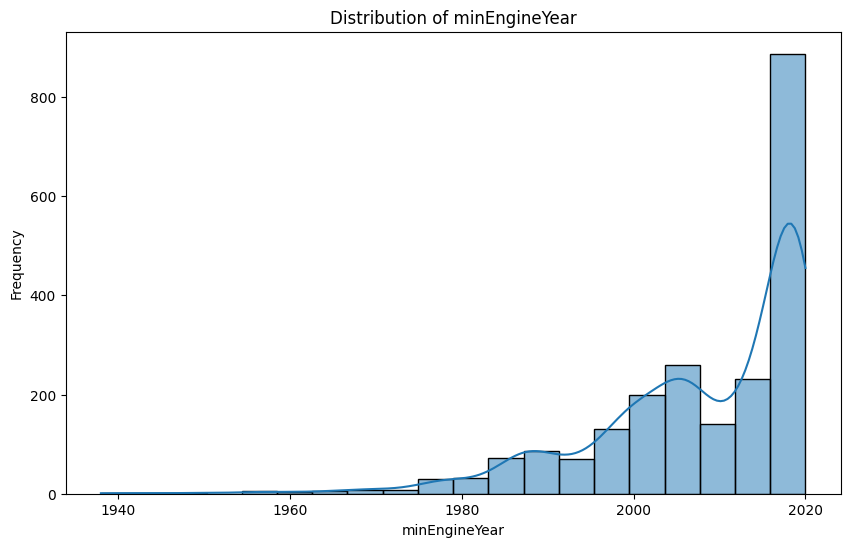

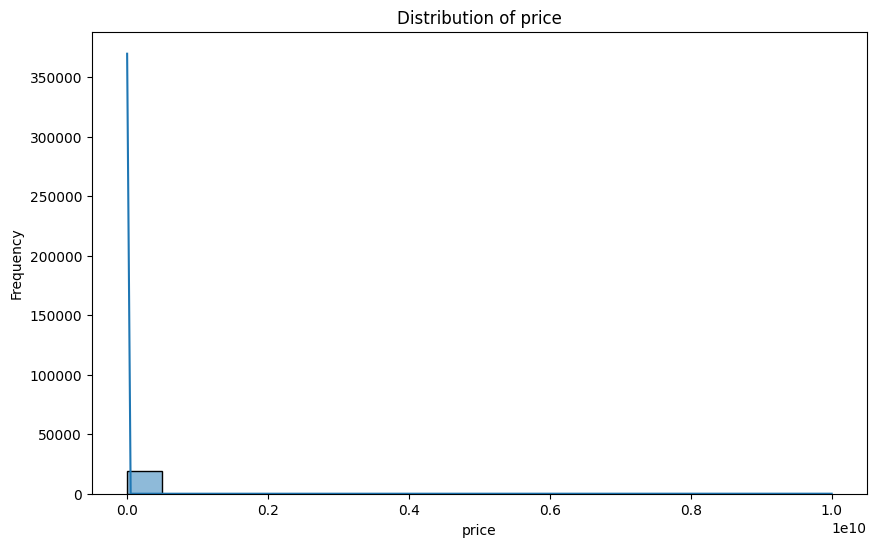

In [ ]:
continuous_vars = ["year", "length_ft", "city", "beam_ft", "dryWeight_lb", "totalHP", "maxEngineYear", "minEngineYear", "price"]
for var in continuous_vars:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[var], bins=20, kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

#Observation from Step 9
* Histogram Interpretation
* Each histogarms shows us the data distribution for a single continuous variable and how they flushate.
* The ideal outcome of histogarm is a bell curve or alightly skewed bell curve
* Selected Continuous Variables:
* year
* length_ft
* beam_ft
* dryWeight_lb
* numEngines
* totalHP
* maxEngineYear
* minEngineYear
* All selected and distribution is good.

# Step 10 Outliers

In [ ]:
#Does not directly identify outliers, helps to understand the distribution and range of values in the "price" variable
print({'mean':df['price'].mean(),
       'median':df['price'].median(),
       'std':df['price'].std(),
       'min':df['price'].min(),
       'max':df['price'].std(),
       })

{'mean': 647146.880930011, 'median': 34195.0, 'std': 73095667.96677485, 'min': 500.0, 'max': 73095667.96677485}


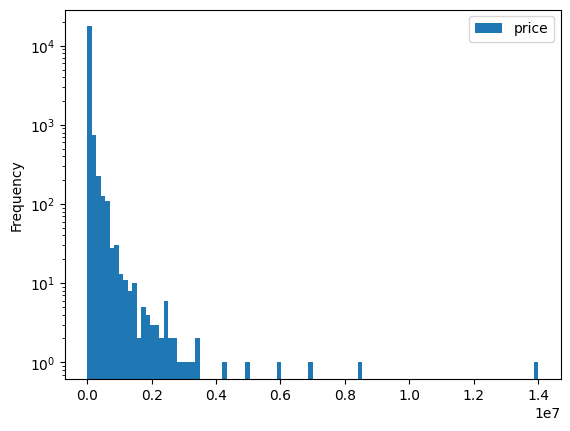

In [ ]:
# Using bin as a function to convert from a decimal value to its corresponding binary value
df.plot.hist(y='price',bins=100)
plt.yscale('log')

#Step 11: Visualising Data Distribution after outlier removal
* I couldn't solve what to do next after the outlier and how to remove it.

#Step 12: Missing Values Analysis
* Missing values are treated for each column seperately.
* If a column has more than 30% data missing, then missing value treatment cannot be done.

In [ ]:
df.isnull().sum()

Unnamed: 0            0
id                    0
type                  0
boatClass             0
make                  0
model                35
year                  0
condition             0
length_ft             0
beam_ft            6504
dryWeight_lb      11807
hullMaterial          0
fuelType           2952
numEngines            0
totalHP             846
maxEngineYear     16696
minEngineYear     16727
engineCategory    10491
price                 0
sellerId              0
city                 56
state                 0
zip                8688
created_date          0
created_month         0
created_year          0
dtype: int64

#Observation from Step 12: Missing Value Analysis
* Out of 24, 12 columns are missing some values.
* Must delete the missing value rows if there are only few records
* Impute the missing values with MEDIAN value for continuous variables
* Impute the missing values with MODE value for categorical variables


Continuous columns that has missing values:
'price', 'year', 'length_ft', 'numEngines'.


#Step 13: Feature Selection (Atrribute Selection)

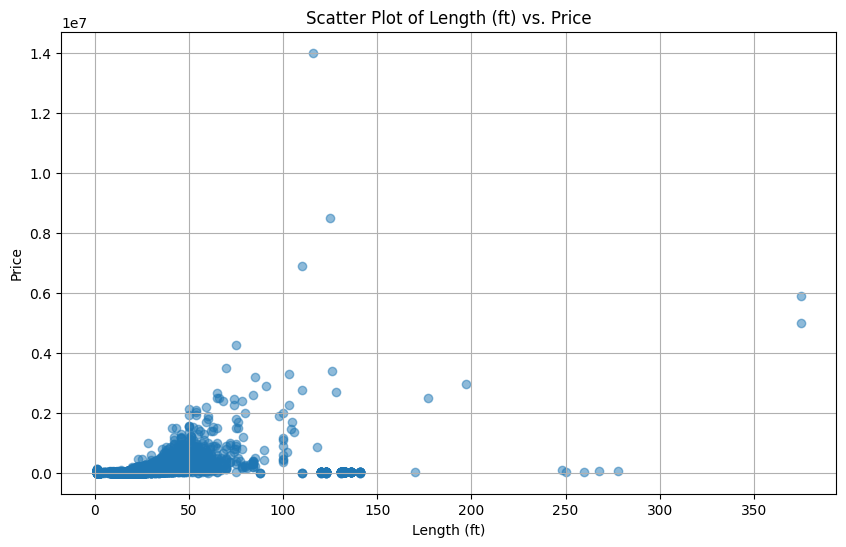

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['length_ft'], df['price'], alpha=0.5)
plt.title('Scatter Plot of Length (ft) vs. Price')
plt.xlabel('Length (ft)')
plt.ylabel('Price')
plt.grid(True)
plt.show()

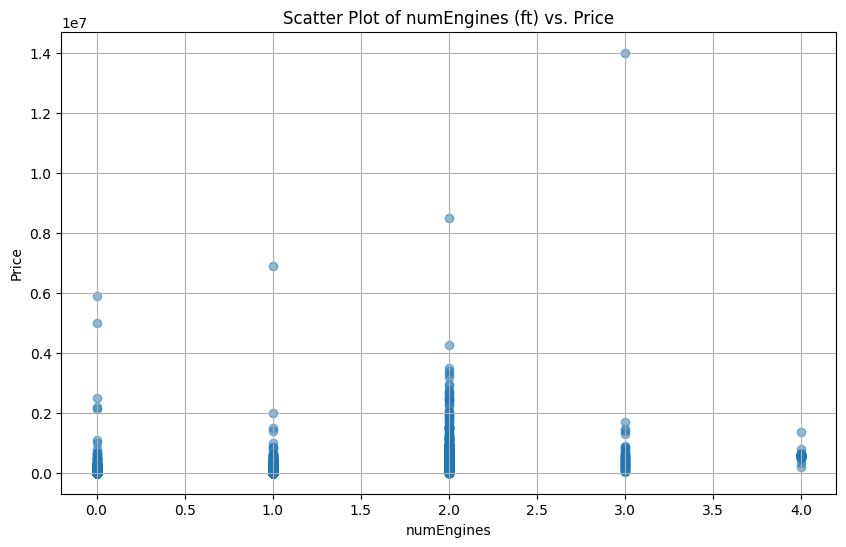

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['numEngines'], df['price'], alpha=0.5)
plt.title('Scatter Plot of numEngines (ft) vs. Price')
plt.xlabel('numEngines')
plt.ylabel('Price')
plt.grid(True)
plt.show()

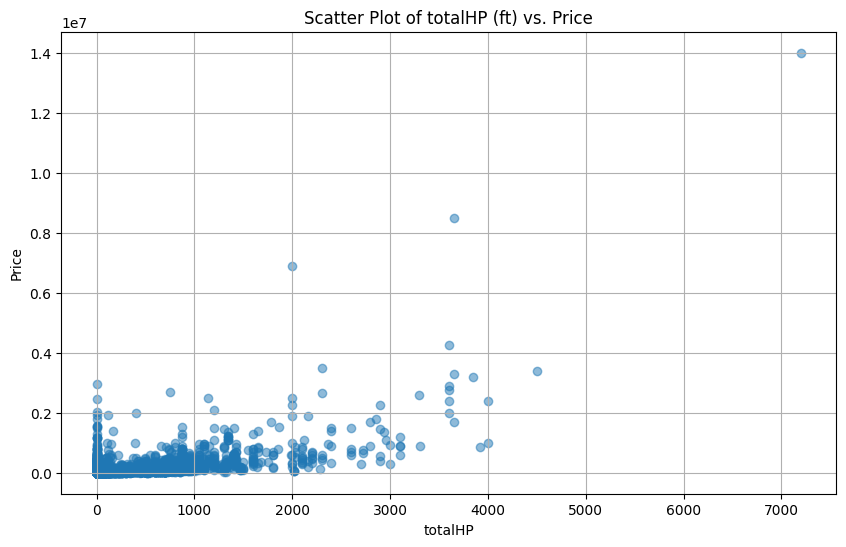

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['totalHP'], df['price'], alpha=0.5)
plt.title('Scatter Plot of totalHP (ft) vs. Price')
plt.xlabel('totalHP')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Scatter Charts interpretation
* What should you look for in these scatter charts?
* Trend: See if there is a visible trend or not. There could be three scenarios
* Increasing Trend: both variables ar epositively correlated.
* Decreaseing Trend: Both variables are negatively correlated.
* No Trend: Can not see any clear increasing or decreasing trend.

#Step 14: Data Pre-processing for Machine Learning Model Building or Model Development

* Changing the continuous variables into numerical name

In [ ]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['type', 'boatClass', 'make', 'condition', 'hullMaterial', 'fuelType', 'engineCategory', 'state', 'city'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()
df['type_encoded'] = label_encoder.fit_transform(df['type'])
df['boatClass_encoded'] = label_encoder.fit_transform(df['boatClass'])
df['make_encoded'] = label_encoder.fit_transform(df['make'])
df['condition_encoded'] = label_encoder.fit_transform(df['condition'])
df['hullMaterial_encoded'] = label_encoder.fit_transform(df['hullMaterial'])
df['fuelType_encoded'] = label_encoder.fit_transform(df['fuelType'])
df['engineCategory_encoded'] = label_encoder.fit_transform(df['engineCategory'])
df['state_encoded'] = label_encoder.fit_transform(df['state'])
df['city_encoded'] = label_encoder.fit_transform(df['city'])

df.drop(['type', 'boatClass', 'make', 'condition', 'hullMaterial', 'fuelType', 'engineCategory', 'state', 'city'], axis=1, inplace=True)

In [ ]:
df.isnull().sum()

Unnamed: 0                    0
id                            0
model                        35
year                          0
length_ft                     0
beam_ft                    6504
dryWeight_lb              11807
numEngines                    0
totalHP                     846
maxEngineYear             16696
minEngineYear             16727
price                         0
sellerId                      0
zip                        8688
created_date                  0
created_month                 0
created_year                  0
type_encoded                  0
boatClass_encoded             0
make_encoded                  0
condition_encoded             0
hullMaterial_encoded          0
fuelType_encoded              0
engineCategory_encoded        0
state_encoded                 0
city_encoded                  0
dtype: int64

#Observation of dumbies
* model, bean_ft, dryWeight_lb, totalHP, maxEngineYear, minEngineYear & zip. has the data.

#Observation Step 14: Data Pre-processing for Machine Learning Model Building or Model Development
* the Continuous variables are now numercial names.

In [ ]:
ContinuousCols=['price', 'year', 'length_ft', 'beam_ft', 'dryWeight_lb', 'numEngines', 'totalHP', 'maxEngineYear', 'minEngineYear']
CorrelationData=df[ContinuousCols].corr()
CorrelationData

,price,year,length_ft,beam_ft,dryWeight_lb,numEngines,totalHP,maxEngineYear,minEngineYear
price,1.000000,-0.027444,0.387627,0.025050,0.541360,0.282818,0.589721,0.077081,0.078456
year,-0.027444,1.000000,-0.219650,-0.000801,-0.438620,-0.175315,-0.194967,0.877927,0.879906
length_ft,0.387627,-0.219650,1.000000,0.030760,0.780297,0.260177,0.357813,-0.328125,-0.329216
beam_ft,0.025050,-0.000801,0.030760,1.000000,0.662015,-0.016197,-0.066791,-0.252221,-0.252441
dryWeight_lb,0.541360,-0.438620,0.780297,0.662015,1.000000,0.439852,0.640246,-0.377028,-0.381077
numEngines,0.282818,-0.175315,0.260177,-0.016197,0.439852,1.000000,0.625390,-0.081182,-0.082796
totalHP,0.589721,-0.194967,0.357813,-0.066791,0.640246,0.625390,1.000000,-0.071270,-0.072732
maxEngineYear,0.077081,0.877927,-0.328125,-0.252221,-0.377028,-0.081182,-0.071270,1.000000,0.997636
minEngineYear,0.078456,0.879906,-0.329216,-0.252441,-0.381077,-0.082796,-0.072732,0.997636,1.000000


In [ ]:
# filtering only those columns wheere absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['price'][abs(CorrelationData['price']) > 0.5]

price           1.000000
dryWeight_lb    0.541360
totalHP         0.589721
Name: price, dtype: float64

#Observations from Step 14
* Final selected Continuous columns:
* 'dryWeight_lb'& 'totalHP

#Step relationship exploration: Categorical VS Continuous
* Tried to analysis the Target variable (price) which is continuous and the categorical variables to see the relationship.

KeyError: 'model_encoded'

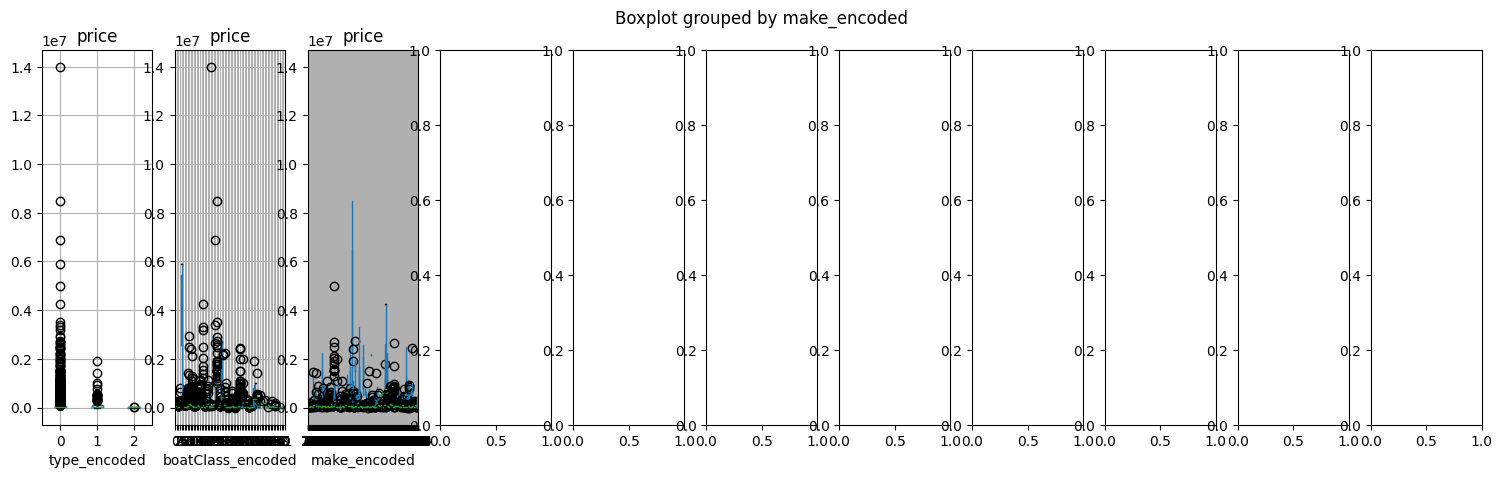

In [ ]:
# Box plots for continuous target Variable "price" and Categorical predictors
CategoricalColsList=['type_encoded', 'boatClass_encoded', 'make_encoded', 'model_encoded', 'condition_encoded', 'hullMaterial_encoded', 'fuelType_encoded', 'engineCategory_encoded', 'city_encoded', 'state_encoded', 'zip_encoded']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "price"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
  df.boxplot(column='price', by= PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

#Observation
*It didn't go well, hasn't have all the output in the boxplot and it's unreadable.

#Step 18: Machine Learning Model Development:

In [ ]:
df.fillna(0, inplace=True)

# Split features and target variable
X = df.drop("price", axis=1)
y = df["price"]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

#T rain a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Evaluate the model
test_predictions = model.predict(X_test)

#Evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, test_predictions)
mse = mean_squared_error(y_test, test_predictions)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)


Mean Absolute Error: 1706004367.4900608
Mean Squared Error: 9.905843022606357e+19


In [ ]:
#Separate Target Variable and Predictor Variables
TargetVariable='price'
Predictors=['dryWeight_lb', 'totalHP', 'make_encoded', 'hullMaterial_encoded', 'engineCategory_encoded', 'city_encoded', 'state_encoded']

X=df[Predictors].values
y=df[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

# Step 20: Multiple Linear Regression Algorithm For ML/AI model building

In [ ]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
RegModel = LinearRegression()
# Now printing all the parameters of Linear regression of the data
print(RegModel)
## Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)
from sklearn import metrics
# Measuring Goodness/the accuratle of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))
print('\n##### Model Validation and Accuracy Calculations ##########')
# Printing some sample values of prediction
df=pd.DataFrame(data=X_test, columns=Predictors)
df[TargetVariable]=y_test
df[('Predicted'+TargetVariable)]=np.round(prediction)
# Printing sample prediction values
print(df.head())
# Calculating the error for each row
df['APE']=100 * ((abs(
df['price']-df['Predictedprice']))/df['price'])
MAPE=np.mean(df['APE'])
MedianMAPE=np.median(df['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)
# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    print('#'*3,'Accuracy:', 100-MAPE)
    return(100-MAPE)
# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))
LinearRegression()

LinearRegression()
R2 Value: 0.3479573902800914

##### Model Validation and Accuracy Calculations ##########
   dryWeight_lb  totalHP  make_encoded  hullMaterial_encoded  \
0           0.0      0.0         519.0                   5.0   
1         744.0     40.0         882.0                   0.0   
2         112.0      0.0         882.0                   0.0   
3           0.0      0.0          88.0                   3.0   
4           0.0      0.0         734.0                   3.0   

   engineCategory_encoded  city_encoded  state_encoded    price  \
0                     9.0         673.0           21.0  58195.0   
1                     7.0         751.0           35.0  13665.0   
2                     5.0         675.0           39.0    789.0   
3                     9.0        1092.0           38.0  29900.0   
4                     9.0         366.0           21.0  51319.0   

   Predictedprice  
0         43796.0  
1         24944.0  
2        -23872.0  
3         51898.0  
4  

LinearRegression()

#Decision Tree Regressor

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.7618150508942246
hiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii
   dryWeight_lb  totalHP  make_encoded  hullMaterial_encoded  \
0           0.0      0.0         519.0                   5.0   
1         744.0     40.0         882.0                   0.0   
2         112.0      0.0         882.0                   0.0   
3           0.0      0.0          88.0                   3.0   
4           0.0      0.0         734.0                   3.0   

   engineCategory_encoded  city_encoded  state_encoded    price  \
0                     9.0         673.0           21.0  58195.0   
1                     7.0         751.0           35.0  13665.0   
2                     5.0         675.0           39.0    789.0   
3                     9.0        1092.0           38.0  29900.0   
4                     9.0         366.0           21.0  51319.0   

   Predictedprice  
0         45924.0  
1         45924.0  
2         45924.0 

AttributeError: 'builtin_function_or_method' object has no attribute 'TestingDataResults'

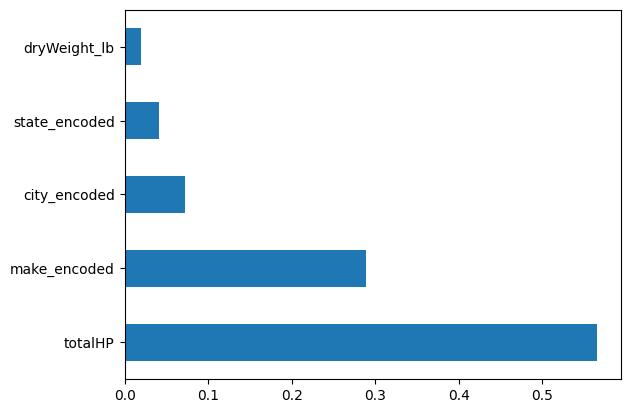

In [ ]:
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5, criterion='friedman_mse')

#Printing all the parameters of Decision Tree
print(RegModel)

#Creating the model (Training data)
DT=RegModel.fit(X_train, y_train)
prediction=DT.predict(X_test)

print('R2 Value:', metrics.r2_score(y_train, DT.predict(X_train)))

#Plotting the feature importance
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest().plot(kind='barh')

print('hiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiii')

TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

print(TestingDataResults.head())

TestingDataResults['APE']=100 * ((abs.TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price']

MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy = 100 - MAPE
MedianAccuracy=100 - MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)

def Accuracy_Score(orig,pred):
  MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
  return(100-MAPE)

from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(RegModel, X, y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


#Observation
* This is showing the "totalHP" is the most to help with price prediction and the most common.
* the second highest is "make_encoded".

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load datasets
df_no = pd.read_csv("BoatsNoPriceDataset.csv")
df = pd.read_csv("BoatsCleanedDataset.csv")

# Merge datasets based on common features
combined_dataset = pd.merge(df, df_no, on="totalHP")

# Split data into features and target variable
X = combined_dataset.drop(columns=["price"])
y = combined_dataset["price"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict prices
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Use the trained model to predict prices for the dataset without prices
predicted_prices = model.predict(df_no.drop(columns=["price"]))


KeyError: "['price'] not found in axis"